Mean Absolute Error Ridge Linear Regression: 0.162829976437694
Mean Absolute Error MLP1: 0.0680414073796843
Iteration 1, loss = 0.39376174
Iteration 2, loss = 0.18649617
Iteration 3, loss = 0.09553212
Iteration 4, loss = 0.05606951
Iteration 5, loss = 0.03844136
Iteration 6, loss = 0.03056873
Iteration 7, loss = 0.02702619
Iteration 8, loss = 0.02525228
Iteration 9, loss = 0.02421860
Iteration 10, loss = 0.02340063
Iteration 11, loss = 0.02268865
Iteration 12, loss = 0.02206846
Iteration 13, loss = 0.02147295
Iteration 14, loss = 0.02091410
Iteration 15, loss = 0.02043585
Iteration 16, loss = 0.01994121
Iteration 17, loss = 0.01949460
Iteration 18, loss = 0.01910488
Iteration 19, loss = 0.01870100
Iteration 20, loss = 0.01830608
Iteration 21, loss = 0.01791976
Iteration 22, loss = 0.01755201
Iteration 23, loss = 0.01718109
Iteration 24, loss = 0.01678190
Iteration 25, loss = 0.01639806
Iteration 26, loss = 0.01603136
Iteration 27, loss = 0.01562536
Iteration 28, loss = 0.01521407
Itera

/usr/local/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


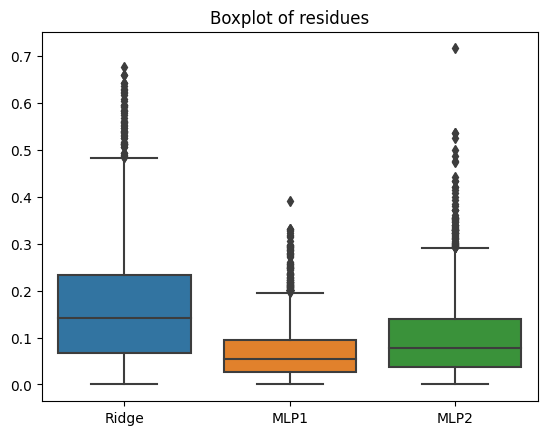

/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_6208/580282489.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residues["Ridge"], hist = True, label = "Ridge")
/var/folders/0v/j168s2s91bxf0vr_r7rn3m_c0000gn/T/ipykernel_6208/580282489.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

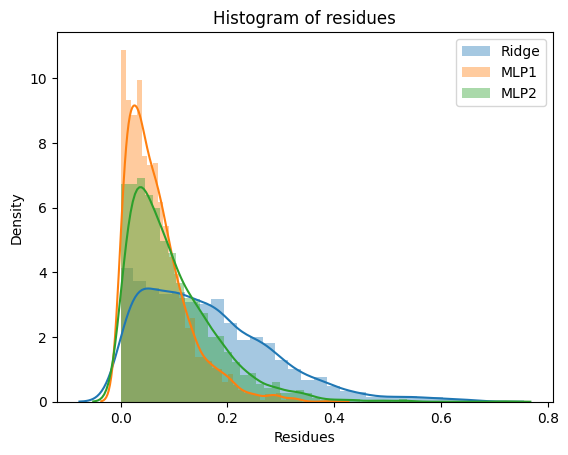

MLP1 iterations to converge: 452
MLP2 iterations to converge: 77
MLP1 converged
MLP2 converged


In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn import metrics, datasets
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred_Ridge = ridge.predict(X_test)
print("Mean Absolute Error Ridge Linear Regression:", metrics.mean_absolute_error(y_test,
y_pred_Ridge))
mlp1 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = "tanh", max_iter = 500, random_state
= 0, early_stopping = True)
mlp1.fit(X_train.values, y_train)
y_pred_mlp1 = mlp1.predict(X_test.values)
print("Mean Absolute Error MLP1:", metrics.mean_absolute_error(y_test, y_pred_mlp1))
mlp2 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = "tanh", max_iter=500, random_state =
0, early_stopping = False, verbose = True)
mlp2.fit(X_train.values, y_train)
y_pred_mlp2 = mlp2.predict(X_test.values)
print("Mean Absolute Error MLP2:", metrics.mean_absolute_error(y_test, y_pred_mlp2))
ridgeResidues = abs(y_test - y_pred_Ridge)
MLP1Residues = abs(y_test - y_pred_mlp1)
MLP2Residues = abs(y_test - y_pred_mlp2)
residues = pd.DataFrame({"Ridge": ridgeResidues, "MLP1": MLP1Residues, "MLP2": MLP2Residues})
sns.boxplot(data = residues)
plt.title("Boxplot of residues")
plt.savefig("boxplots.png")
plt.show()
sns.distplot(residues["Ridge"], hist = True, label = "Ridge")
sns.distplot(residues["MLP1"], hist = True, label = "MLP1")
sns.distplot(residues["MLP2"], hist = True, label = "MLP2")
plt.title("Histogram of residues")
plt.legend()
plt.xlabel("Residues")
plt.savefig("histograms.png")
plt.show()
print("MLP1 iterations to converge:", mlp1.n_iter_)
print("MLP2 iterations to converge:", mlp2.n_iter_)
if mlp1.n_iter_ < mlp1.max_iter:
    print("MLP1 converged")
else:
    print("MLP1 did not converge")
if mlp2.n_iter_ < mlp2.max_iter:
    print("MLP2 converged")
else:
    print("MLP2 did not converge")